# Introduction to ML


## Summary

* Run install_packages.ipynb

* Ex1: End-to-end decision tree
    * Step 1: Data
    * Step 2: Processing
    * Step 3: Modeling (no vectorization step)
    * Step 4: Visualization
    * Change parameters
    
* Ex2: Cleanse and vectorization applied to natural language

## Ex1: End-to-end project: Decision Tree

### Goals

* Predict survival rate of titanic passengers
* Practice decision trees
* End-to-end ML project

### About the data

We will use the well known Titanic dataset.

The dataset has the following columns:

* `Survived` - boolean
    * 0 - No
    * 1 - Yes
    
* `Pclass` (passenger class) - enumerated
    * 1
    * 2
    * 3
    
* `Name` - string

* `Sex` - enumerated
    * male
    * female

* `Age` - integer

* `Siblings/Spouses Aboard` (number of siblings/spouses) - integer

* `Parents/Children Aboard` (number of parents/children) - integer

* `Fare` (in pounds) - float

### First things first: import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Step 1: Data

In [2]:
# Load data into a pandas dataframe
df = pd.read_csv("titanic.csv")

# See the first 10 rows
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


### Step 2: Processing

Rename columns with more simple names:

In [3]:
df = df.rename(columns={
    "Survived": "survived",
    "Pclass": "pclass",
    "Name": "name",
    "Sex": "sex",
    "Age": "age",
    "Siblings/Spouses Aboard": "ss_ab",
    "Parents/Children Aboard": "pc_ab",
    "Fare": "fare"
})

Select columns (drop the ones that don't look like relevant):

In [4]:
df = df[["survived", "pclass", "sex", "age", "ss_ab", "pc_ab"]]

Convert `sex` string to numbers:

* 1 for `female`
* 2 for `male`

In [5]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [6]:
# Do not run this cell more than once
df["sex"] = df["sex"].apply(lambda x: 1 if (x == "female") else 2)

df

,survived,pclass,sex,age,ss_ab,pc_ab
0,0,3,2,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,2,35.0,0,0
...,...,...,...,...,...,...
882,0,2,2,27.0,0,0
883,1,1,1,19.0,0,0
884,0,3,1,7.0,1,2
885,1,1,2,26.0,0,0


### Step 3: Modelling

Separate features and target:

In [7]:
# Features
features = ["pclass", "sex", "age", "ss_ab", "pc_ab"]
X = df[features]

# Target (label)
y = df["survived"]

Create training dataset and test dataset (80/20 split):

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f"Training: X: {X_train.shape} y: {y_train.shape}")
print(f"Test: X: {X_test.shape} y: {y_test.shape}")

Training: X: (709, 5) y: (709,)
Test: X: (178, 5) y: (178,)


Build decision tree model (fit):

In [9]:
max_depth = 3
clf = DecisionTreeClassifier(max_depth=max_depth)

clf = clf.fit(X_train, y_train)

Predict:

In [10]:
y_pred = clf.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

print(f"Report:\n{metrics.classification_report(y_test, y_pred)}")

Accuracy: 0.8033707865168539
Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       106
           1       0.78      0.72      0.75        72

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



### Step 4: Visualization

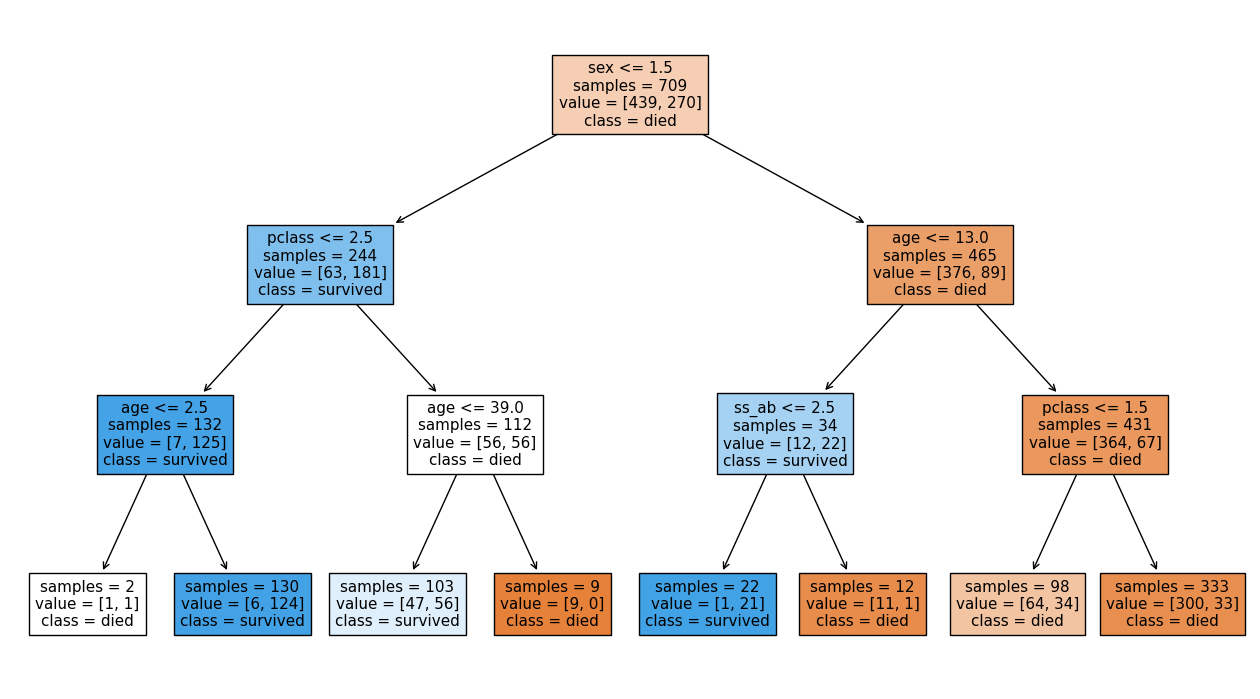

In [11]:
# Labels are:
#     0 -> died
#     1 -> survived

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,9), dpi=100)

plot_tree(clf,
          feature_names = features,
          class_names=["died", "survived"],
          impurity=False,
          filled=True)

fig.savefig("titanic_decision_tree.png")

Profiles of people that survived:
    
* Woman, rich (class 1 or 2), age between 3 and 39

Profiles of people that died:

* Man, older than 13, poor (class 2 or 3)

In [12]:
# Woman, rich (classe 1 or 2), age between 3 and 39
# ["pclass", "sex", "age", "ss_ab", "pc_ab"] = [1, 1, 20, 0, 0]
prediction = clf.predict([[1,1,38,0,0]])
print(prediction)


# Man, older than 13, poor (class 2 or 3)
# ["pclass", "sex", "age", "ss_ab", "pc_ab"] = [2, 2, 1000, 0, 0]
prediction = clf.predict([[3, 2, 30, 0, 0]])
print(prediction)

[1]
[0]


### Change some parameters

Accuracy: 0.7584269662921348


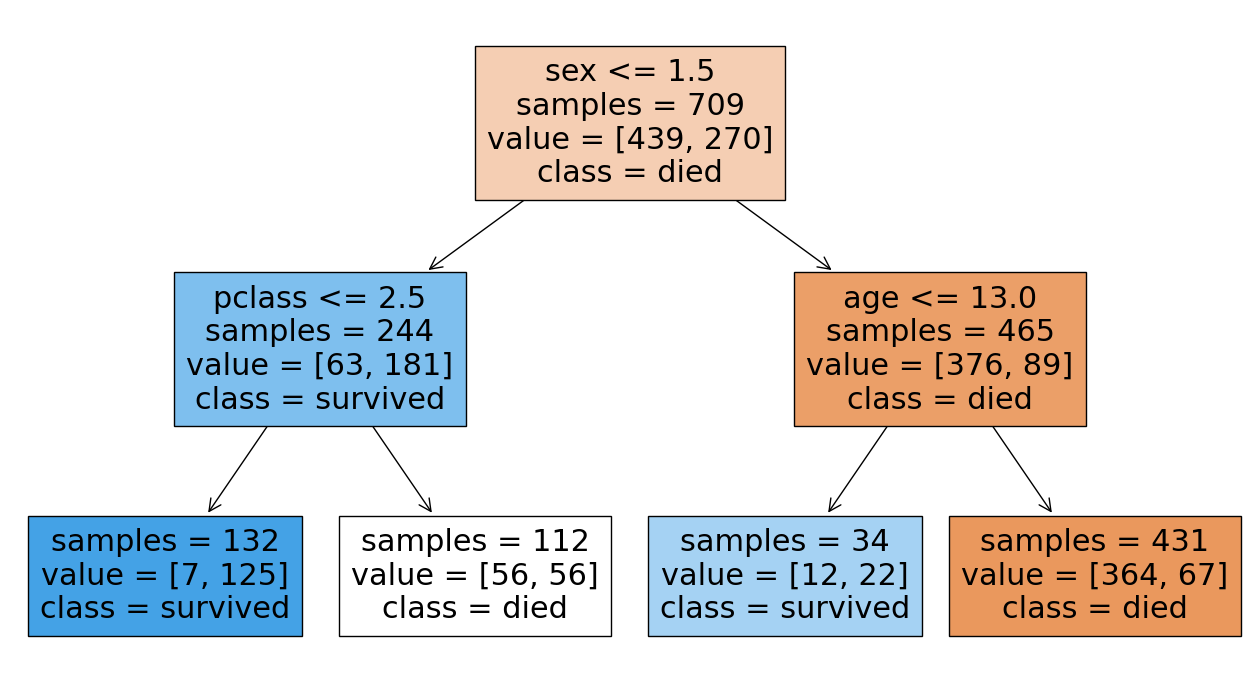

In [13]:
features = ["pclass", "sex", "age", "ss_ab", "pc_ab"]
X = df[features]
y = df["survived"]

# IMPORTANT -> change test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# IMPORTANT -> change max_depth (integer or None)
max_depth = 2
clf = DecisionTreeClassifier(max_depth=max_depth)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,9), dpi=100)

plot_tree(clf,
          feature_names = features,
          class_names=["died", "survived"],
          impurity=False,
          filled=True)

fig.savefig("titanic_decision_tree.png")

## Ex 2: Cleanse and vectorization applied to natural language

### First things first

In [26]:
import re

dummy = "The lazy dog jumped_'-! over the sleeping 123456FOX!"

#### Only alphabetic chars

In [28]:
''.join((x for x in "MadMax25" if x.isalpha()))

'MadMax'

In [29]:
''.join((x for x in dummy if x.isalpha()))

'ThelazydogjumpedoverthesleepingFOX'

#### Let's use regular expressions

In [34]:
re.sub('[^a-zA-Z\ ]', '', dummy)

'The lazy dog jumped over the sleeping FOX'

### Removing with regular expressions

In [17]:
import re
s = 'as32{ vd"s k!+'
print(re.sub('[^a-zA-Z\ ]+', '', s))

as vds k
